In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])
model.weights

[<tf.Variable 'layer_1/kernel:0' shape=(784, 16) dtype=float32, numpy=
 array([[ 0.07004161, -0.03061725,  0.01622507, ..., -0.01993783,
         -0.04681263,  0.01476642],
        [ 0.01226252, -0.00169975, -0.07004688, ..., -0.03904217,
          0.05059567, -0.00159509],
        [ 0.0857076 ,  0.01695901, -0.03603926, ..., -0.02710137,
         -0.0439086 , -0.04898864],
        ...,
        [ 0.08326007,  0.02585846, -0.04033137, ..., -0.03669854,
         -0.02755708, -0.08568921],
        [-0.00801302,  0.0757793 ,  0.08502729, ...,  0.08136261,
          0.01228069,  0.02731451],
        [-0.01146451,  0.01597203, -0.03736015, ...,  0.04834887,
         -0.01699226, -0.06815314]], dtype=float32)>,
 <tf.Variable 'layer_1/bias:0' shape=(16,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'dense/kernel:0' shape=(16, 16) dtype=float32, numpy=
 array([[ 0.2310234 , -0.00827372,  0.03278899, -0.19254

In [4]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import tensorflow as tf

#### Build a convolutional neural network model

In [49]:
# Build the Sequential convolutional neural network model

model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [50]:
# Print the model summary

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [51]:
# Define the model optimizer, loss function and metrics

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy', 'mae']
)

In [52]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7fa82c3e7be0>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7fa82c46f9e8>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [53]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [54]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [55]:
# Print the shape of the training data

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [56]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
print(train_labels[0])

9


In [57]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/255.
test_images = test_images/255.

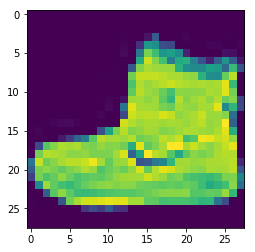

label: Ankle boot


In [58]:
# Display one of the images

i = 0
img = train_images[i, :, :]
plt.imshow(img)
plt.show()
print("label:", labels[train_labels[i]])

#### Fit the model

In [60]:
# Fit the model

history = model.fit(train_images[..., np.newaxis], train_labels, epochs=2, batch_size=256, verbose=2)

Train on 60000 samples
Epoch 1/2
60000/60000 - 45s - loss: 0.3378 - accuracy: 0.8796 - mae: 4.4200
Epoch 2/2
60000/60000 - 45s - loss: 0.3203 - accuracy: 0.8860 - mae: 4.4200


#### Plot training history

In [61]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.337849,0.879617,4.420000
1,0.320348,0.886033,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

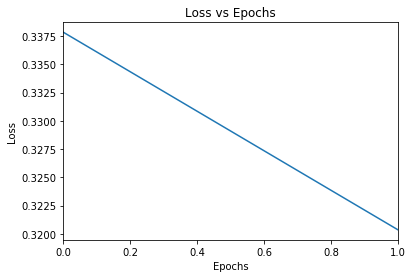

In [62]:
# Make a plot for the loss

loss_plot = df.plot(y = "loss", title = "Loss vs Epochs", legend=False)
loss_plot.set(xlabel = "Epochs", ylabel="Loss")

[Text(0, 0.5, 'ACC'), Text(0.5, 0, 'Epochs')]

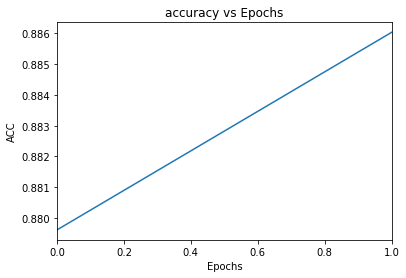

In [63]:
# Make a plot for the accuracy

loss_plot = df.plot(y = "accuracy", title = "accuracy vs Epochs", legend=False)
loss_plot.set(xlabel = "Epochs", ylabel="ACC")

[Text(0, 0.5, 'mae'), Text(0.5, 0, 'Epochs')]

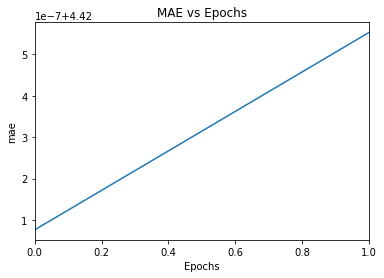

In [64]:
# Make a plot for the additional metric

loss_plot = df.plot(y = "mae", title = "MAE vs Epochs", legend=False)
loss_plot.set(xlabel = "Epochs", ylabel="mae")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [65]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [68]:
# Evaluate the model

model.evaluate(test_images[..., np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.3614 - accuracy: 0.8808 - mae: 4.4200


[0.33581730518341063, 0.8808, 4.419997]

#### Make predictions from the model

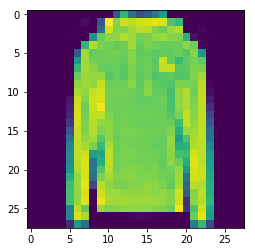

Label: Pullover


(28, 28)

In [70]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")
test_image.shape

In [76]:
# Get the model predictions

prediction = model.predict(test_image[np.newaxis, ..., np.newaxis])
print(labels[np.argmax(prediction)])

Pullover
